# Town Boundaries of Bicol Region

## 0 Preliminaries

In [1]:
import os

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [2]:
BASE_PATH = os.path.join(".", "outputs")

if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH)

## 1 Load data from [Humanitarian Data Exchange](https://data.humdata.org/dataset/cod-ab-phl)

In [3]:
filename = (
    "https://data.humdata.org/dataset/caf116df-f984-4deb-85ca-41b349d3f313/resource/"
    "314cbaea-c7a0-4ce9-a4ea-e5af2a788ac1/download/phl_adm_psa_namria_20231106_gdb.gdb.zip"
)

gdf_bounds = gpd.read_file(filename, layer="phl_admbnda_adm3_psa_namria_20231106")
gdf_bounds.head()

/home/ainz/Code/transport-network-analysis/.venv/lib64/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts.  The processing may be really slow.  You can skip the processing by setting METHOD=SKIP.
  return ogr_read(


,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,ADM3_REF,ADM3ALT1EN,Shape_Length,Shape_Area,AREA_SQKM,geometry
0,Adams,PH0102801,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,None,None,0.423604,0.009506,111.143026,"MULTIPOLYGON (((120.96915 18.51012, 120.95867 ..."
1,Bacarra,PH0102802,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,None,None,0.309136,0.004725,55.303195,"MULTIPOLYGON (((120.66821 18.28705, 120.66441 ..."
2,Badoc,PH0102803,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,None,None,0.599295,0.006880,80.683970,"MULTIPOLYGON (((120.47814 17.97717, 120.47816 ..."
3,Bangui,PH0102804,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,None,None,0.483066,0.009843,115.059041,"MULTIPOLYGON (((120.81318 18.53457, 120.81358 ..."
4,City of Batac,PH0102805,Ilocos Norte,PH01028,Region I (Ilocos Region),PH01,Philippines (the),PH,2022-11-09 00:00:00+00:00,2023-11-06 00:00:00+00:00,NaT,None,None,0.613500,0.013493,158.123132,"MULTIPOLYGON (((120.61242 18.10947, 120.612 18..."


## 2 Limit coverage to Bicol Region

In [4]:
gdf_bounds = gdf_bounds[gdf_bounds["ADM1_EN"].str.contains("Bicol")]
gdf_bounds = gdf_bounds.reset_index(drop=True)

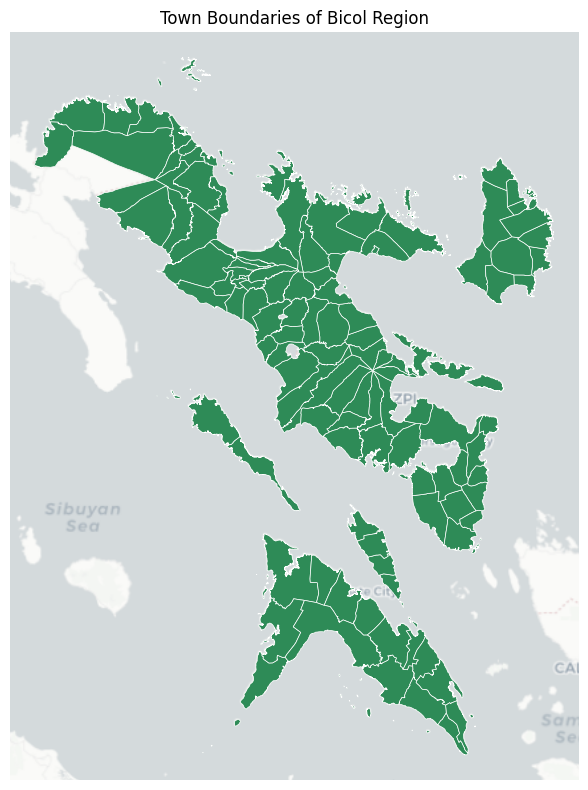

In [5]:
_, ax = plt.subplots(figsize=(8, 8))

gdf_bounds.plot(ax=ax, edgecolor="white", facecolor="seagreen", linewidth=0.5)

x_min, y_min, x_max, y_max = gdf_bounds.total_bounds
padding = 0.1
ax.set_xlim(x_min - padding, x_max + padding)
ax.set_ylim(y_min - padding, y_max + padding)

cx.add_basemap(
    ax,
    crs=gdf_bounds.crs,
    source=cx.providers.CartoDB.Positron,
    attribution="",
)

ax.set_title("Town Boundaries of Bicol Region")
ax.set_axis_off()
plt.tight_layout()

filepath = os.path.join(BASE_PATH, "boundaries.png")
plt.savefig(filepath, dpi=300, bbox_inches="tight")

plt.show()

## 3 Select relevant columns

In [6]:
gdf_bounds = gdf_bounds[["ADM3_EN", "ADM2_EN", "geometry"]]
gdf_bounds = gdf_bounds.rename(columns={"ADM3_EN": "town", "ADM2_EN": "province"})
gdf_bounds.head()

,town,province,geometry
0,Bacacay,Albay,"MULTIPOLYGON (((123.84193 13.3341, 123.84204 1..."
1,Camalig,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65536 1..."
2,Daraga (Locsin),Albay,"MULTIPOLYGON (((123.71487 13.03995, 123.71474 ..."
3,Guinobatan,Albay,"MULTIPOLYGON (((123.68355 13.25321, 123.67729 ..."
4,Jovellar,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65568 1..."


## 4 Format town names

In [7]:
gdf_bounds["town"] = gdf_bounds["town"].str.replace(r"\s*\(.*\)", "", regex=True)

mask = gdf_bounds["town"].str.startswith("City of ", na=False)
gdf_bounds.loc[mask, "town"] = gdf_bounds["town"].str.removeprefix("City of ")
gdf_bounds.loc[mask, "town"] = gdf_bounds["town"] + " City"

gdf_bounds["town"].unique()

array(['Bacacay', 'Camalig', 'Daraga', 'Guinobatan', 'Jovellar',
       'Legazpi City', 'Libon', 'Ligao City', 'Malilipot', 'Malinao',
       'Manito', 'Oas', 'Pio Duran', 'Polangui', 'Rapu-Rapu',
       'Santo Domingo', 'Tabaco City', 'Tiwi', 'Basud', 'Capalonga',
       'Daet', 'San Lorenzo Ruiz', 'Jose Panganiban', 'Labo', 'Mercedes',
       'Paracale', 'San Vicente', 'Santa Elena', 'Talisay', 'Vinzons',
       'Baao', 'Balatan', 'Bato', 'Bombon', 'Buhi', 'Bula', 'Cabusao',
       'Calabanga', 'Camaligan', 'Canaman', 'Caramoan', 'Del Gallego',
       'Gainza', 'Garchitorena', 'Goa', 'Iriga City', 'Lagonoy',
       'Libmanan', 'Lupi', 'Magarao', 'Milaor', 'Minalabac', 'Nabua',
       'Naga City', 'Ocampo', 'Pamplona', 'Pasacao', 'Pili',
       'Presentacion', 'Ragay', 'Sagñay', 'San Fernando', 'San Jose',
       'Sipocot', 'Siruma', 'Tigaon', 'Tinambac', 'Bagamanoc', 'Baras',
       'Caramoran', 'Gigmoto', 'Pandan', 'Panganiban', 'San Andres',
       'San Miguel', 'Viga', 'Virac', 'A

## 5 Save data

In [8]:
filepath = os.path.join(BASE_PATH, "boundaries.gpkg")
gdf_bounds.to_file(filepath, driver="GPKG")